<a href="https://colab.research.google.com/github/dawidswitala/dw_matrix/blob/master/day_4_augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score
%load_ext tensorboard



In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'


/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train=pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')
train.keys()

X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

X_test, y_test = test['features'], test['labels']

In [0]:
np.unique(y_train)  #wszytkie unikatowe wartosci

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
len(np.unique(y_train))

43

In [0]:
to_categorical(y_train[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)

In [0]:
y_train.shape  #34799 wierszy i 43 kolumny - macierz

(34799, 43)

In [0]:
input_shape = X_train.shape[1:]
num_classes= y_train.shape[1]


In [0]:
model = Sequential([
            Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape) ,
            Flatten(),
            Dense(num_classes, activation='softmax'),      
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 11.1412 - accuracy: 0.7944


In [0]:
def get_cnn_v1(input_shape,num_classes):
 return Sequential([
            Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape) ,
            Flatten(),
            Dense(num_classes, activation='softmax'),      ])
  
def train_model(model,X_train,y_train, params_fit ={} ):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(X_train,
            y_train,
            batch_size = params_fit.get('batch_size', 128),
            epochs = params_fit.get('epochs', 5),
            verbose = params_fit.get('verbose', 1),
            validation_data = params_fit.get('validation_data', (X_train,y_train)),
            callbacks=[tensorboard_callbacks]
            
            )
  return model


In [7]:
model = get_cnn_v1(input_shape,num_classes)
model_trained = train_model(model,X_train,y_train )

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 43.9352 - accuracy: 0.6999 - val_loss: 0.2248 - val_accuracy: 0.9486
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2224 - accuracy: 0.9507 - val_loss: 0.1650 - val_accuracy: 0.9630
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1371 - accuracy: 0.9690 - val_loss: 0.0685 - val_accuracy: 0.9823
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0841 - accuracy: 0.9815 - val_loss: 0.0671 - val_accuracy: 0.9856
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1295 - accuracy: 0.9721 - val_loss: 0.0647 - val_accuracy: 0.9845


In [9]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score ):
 
  y_test_norm = np.argmax(y_test,axis=1)
  y_pred_prob = model_trained.predict(X_test)
  y_pred=np.argmax(y_pred_prob,axis=1)
  return scoring(y_test_norm,y_pred)



array([3.2074753e-05, 1.2933907e-02, 1.2011747e-10, 1.3098362e-12,
       9.8703408e-01, 3.0286287e-11, 2.9135414e-12, 4.9600714e-16,
       3.8983733e-25, 8.9927835e-14, 1.6719258e-23, 3.8769349e-11,
       3.6910326e-25, 7.1568692e-18, 1.5332733e-24, 2.1769207e-30,
       4.9356542e-21, 2.2940733e-38, 2.8686110e-16, 2.1679276e-24,
       1.5541638e-20, 8.9578077e-18, 9.7120913e-23, 1.6123739e-20,
       1.5712394e-24, 1.2141995e-27, 1.3914515e-24, 1.1312108e-26,
       7.6537951e-22, 1.7553360e-21, 1.3516892e-18, 2.8120428e-24,
       2.9261469e-25, 1.4203862e-22, 9.1976005e-25, 7.6911754e-21,
       5.1084622e-27, 1.9875318e-21, 3.0002059e-24, 2.4960242e-37,
       1.6925224e-18, 1.0758090e-24, 7.6820460e-12], dtype=float32)

In [10]:
 predict(model_trained, X_test, y_test)

0.8356009070294784

In [0]:
df=pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [21]:
y_pred_prob_2 = model_trained.predict(X_test)
y_pred_prob_2[1000]

array([1.1672590e-17, 1.9012409e-09, 5.6788223e-15, 9.0858237e-21,
       1.0000000e+00, 2.0164795e-11, 4.9412225e-33, 2.4665835e-11,
       5.8176347e-17, 2.3706151e-19, 2.6396382e-23, 3.1151839e-29,
       8.1128761e-30, 2.4533146e-26, 1.6465018e-31, 1.1725678e-28,
       1.4274818e-21, 0.0000000e+00, 2.4324366e-22, 9.3272333e-27,
       4.1003109e-25, 8.8614689e-31, 2.2720015e-27, 4.2484665e-26,
       2.0466110e-25, 3.7810723e-26, 1.4174445e-27, 4.8339873e-31,
       2.0196481e-29, 4.4498656e-23, 2.4587975e-32, 2.1184746e-26,
       0.0000000e+00, 1.3225371e-31, 7.2746993e-36, 0.0000000e+00,
       5.2879719e-32, 1.9864632e-37, 2.4700331e-31, 8.6987831e-34,
       1.8155408e-35, 3.2987469e-37, 2.0152066e-30], dtype=float32)

In [22]:
np.argmax(y_pred_prob_2[1000])

4

In [24]:
labels_dict[ np.argmax(y_pred_prob_2[1000]) ]

'Speed limit (70km/h)'

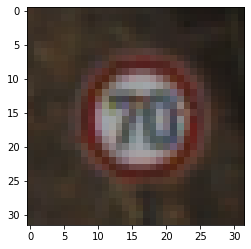

In [19]:
plt.imshow(X_test[1000])

<BarContainer object of 43 artists>

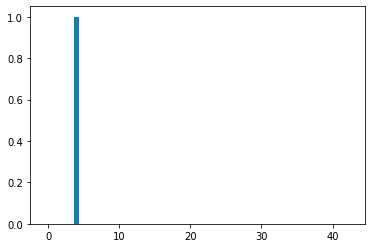

In [26]:
plt.bar(range(43), y_pred_prob_2[1000])

In [0]:
def train_and_predict(model):
  
  model_trained = train_model(model,X_train,y_train )
  return predict(model_trained, X_test, y_test)

In [31]:
def get_cnn_v2(input_shape,num_classes):
 return Sequential([
            Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape) ,
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters = 64, kernel_size=(3,3), activation='relu') ,
            MaxPool2D(),
            Dropout(0.3),

            Flatten(),
            Dense(1024, activation='relu'),     
            Dropout(0.3),
            Dense(num_classes, activation='softmax'),
              ])


train_and_predict(  get_cnn_v2(input_shape,num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 4.6191 - accuracy: 0.3238 - val_loss: 1.1800 - val_accuracy: 0.6965
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.9765 - accuracy: 0.7108 - val_loss: 0.3034 - val_accuracy: 0.9358
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.4884 - accuracy: 0.8565 - val_loss: 0.1412 - val_accuracy: 0.9677
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3276 - accuracy: 0.9019 - val_loss: 0.0760 - val_accuracy: 0.9818
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2525 - accuracy: 0.9243 - val_loss: 0.0556 - val_accuracy: 0.9853


0.8954648526077098

In [32]:
def get_cnn_v3(input_shape,num_classes):
 return Sequential([
            Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape) ,
            Conv2D(filters = 32, kernel_size=(3,3), activation='relu') ,
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters = 64, kernel_size=(3,3), activation='relu') ,
            Conv2D(filters = 64, kernel_size=(3,3), activation='relu') ,
            MaxPool2D(),
            Dropout(0.3),

            Flatten(),
            Dense(1024, activation='relu'),     
            Dropout(0.3),
            Dense(num_classes, activation='softmax'),
              ])


train_and_predict(  get_cnn_v3(input_shape,num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.4269 - accuracy: 0.4817 - val_loss: 0.4065 - val_accuracy: 0.8937
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4886 - accuracy: 0.8588 - val_loss: 0.0887 - val_accuracy: 0.9804
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2555 - accuracy: 0.9260 - val_loss: 0.0482 - val_accuracy: 0.9900
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1706 - accuracy: 0.9508 - val_loss: 0.0235 - val_accuracy: 0.9944
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1273 - accuracy: 0.9636 - val_loss: 0.0228 - val_accuracy: 0.9953


0.9634920634920635

In [33]:
def get_cnn_v4(input_shape,num_classes):
 return Sequential([
            Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape) ,
            Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same') ,
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters = 64, kernel_size=(3,3), activation='relu') ,
            Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same') ,
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters = 64, kernel_size=(3,3), activation='relu') ,
            Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same') ,
            MaxPool2D(),
            Dropout(0.3),

            Flatten(),
            Dense(1024, activation='relu'),     
            Dropout(0.3),
            Dense(num_classes, activation='softmax'),
              ])


train_and_predict(  get_cnn_v4(input_shape,num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.2165 - accuracy: 0.4071 - val_loss: 0.4579 - val_accuracy: 0.8781
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.5054 - accuracy: 0.8512 - val_loss: 0.0965 - val_accuracy: 0.9749
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2509 - accuracy: 0.9245 - val_loss: 0.0552 - val_accuracy: 0.9839
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1791 - accuracy: 0.9478 - val_loss: 0.0329 - val_accuracy: 0.9911
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1394 - accuracy: 0.9595 - val_loss: 0.0269 - val_accuracy: 0.9933


0.9696145124716553

In [34]:
def get_cnn_v5(input_shape,num_classes):
 return Sequential([
            Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape) ,
            Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same') ,
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters = 64, kernel_size=(3,3), activation='relu') ,
            Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same') ,
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters = 64, kernel_size=(3,3), activation='relu') ,
            Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same') ,
            MaxPool2D(),
            Dropout(0.3),

            Flatten(),
            
            Dense(1024, activation='relu'),     
            Dropout(0.3),

            Dense(1024, activation='relu'),     
            Dropout(0.3),
            
            Dense(num_classes, activation='softmax'),
              ])


train_and_predict(  get_cnn_v5(input_shape,num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.5977 - accuracy: 0.2845 - val_loss: 1.3419 - val_accuracy: 0.5423
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 1.0037 - accuracy: 0.6763 - val_loss: 0.2958 - val_accuracy: 0.9090
Epoch 3/5
272/272 [==============================] - 4s 17ms/step - loss: 0.4281 - accuracy: 0.8637 - val_loss: 0.1459 - val_accuracy: 0.9597
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2772 - accuracy: 0.9171 - val_loss: 0.0608 - val_accuracy: 0.9829
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2007 - accuracy: 0.9379 - val_loss: 0.0391 - val_accuracy: 0.9887


0.9607709750566893

In [0]:
X_train_grey = color.rgb2gray(X_train).shape
X_test_grey = color.rgb2gray(X_test).shape


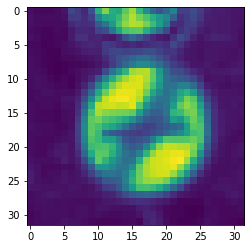

In [36]:
plt.imshow(color.rgb2gray(X_train[0]))

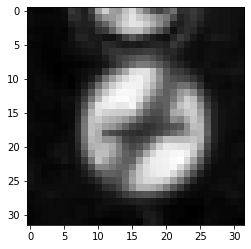

In [37]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))

In [0]:
X_train_grey = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_grey = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [47]:
model = get_cnn_v5((32,32,1),num_classes)
model_trained = train_model(model,X_train_grey,y_train, params_fit={} )
predict(model_trained, X_test_grey, y_test )

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.5866 - accuracy: 0.2613 - val_loss: 0.7214 - val_accuracy: 0.7612
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.5358 - accuracy: 0.8233 - val_loss: 0.1307 - val_accuracy: 0.9623
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2371 - accuracy: 0.9241 - val_loss: 0.0705 - val_accuracy: 0.9801
Epoch 4/5
272/272 [==============================] - 4s 17ms/step - loss: 0.1515 - accuracy: 0.9527 - val_loss: 0.0316 - val_accuracy: 0.9911
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1211 - accuracy: 0.9620 - val_loss: 0.0376 - val_accuracy: 0.9888


0.9657596371882086